In [32]:
import osmnx as ox
import networkx as nx
import ipyleaflet as ipl

from shapely.geometry import Polygon
from ipyleaflet import Map, Marker, FullScreenControl, AwesomeIcon
from ipywidgets import interact
from time import sleep

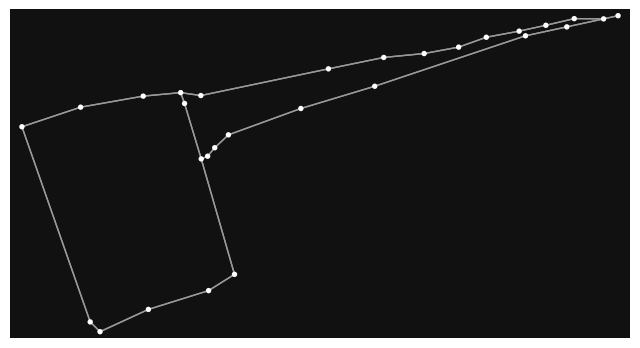

In [33]:
# Setting up graph for CMRIT
## Using boundbox

north, south, east, west = 12.96768338736144,12.965518842636625,77.71393642911939,77.71046157295785
# cmrit lat long bounds 0
# north (float) – northern latitude of bounding box: 12.96768338736144
# south (float) – southern latitude of bounding box: 12.965518842636625
# east (float) – eastern longitude of bounding box: 77.71393642911939
# west (float) – western longitude of bounding box: 77.71046157295785
network_type = 'all_private' # "all_private", "all", "bike", "drive", "drive_service", "walk"

G = ox.graph_from_bbox(
      north, south, east, west, 
      network_type=network_type, 
      simplify=False, 
      retain_all=False, 
      truncate_by_edge=True, 
      clean_periphery=True, 
      custom_filter=None)

# Plot the graph
fig, ax = ox.plot_graph(G)

In [34]:
sorted(G.nodes)

[3798918923,
 4159727894,
 4159727896,
 4159727902,
 4159727904,
 4159727905,
 4159727907,
 4159727909,
 4159727912,
 4159727914,
 6034177872,
 6034177873,
 6034177874,
 6034177875,
 6034178422,
 6034178423,
 6197424688,
 6197424689,
 7507343460,
 7511176866,
 7511208233,
 7511208234,
 7511208235,
 7511208236,
 7511289705,
 7511289706,
 7511289707,
 7511333522,
 7511333523]

In [35]:
# Finding the shortest path with the given start and end lat-lng
optimizer = 'length'

start_latlng = (12.96751, 77.71388) # cmrit-entrance
end_latlng = (12.96606,77.71146) # ganesha-turn

orig_node = ox.distance.nearest_nodes(G, start_latlng[1], start_latlng[0])
dest_node = ox.distance.nearest_nodes(G, end_latlng[1], end_latlng[0])

shortest_route = nx.shortest_path(G, orig_node, dest_node, weight=optimizer)

shortest_route_map = ox.plot_route_folium(G, shortest_route)
shortest_route_map

In [36]:
# To find the coordinates in the shortest path
route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_route]
route_coords

[(12.967455, 77.7139021),
 (12.9674174, 77.7137248),
 (12.9673755, 77.7135256),
 (12.9671386, 77.7127992),
 (12.9670341, 77.7124431),
 (12.9669103, 77.712094),
 (12.9668498, 77.7120281),
 (12.96681, 77.7119938),
 (12.9667974, 77.711963),
 (12.9662552, 77.7121233),
 (12.9661788, 77.7119984),
 (12.9660905, 77.7117083),
 (12.9659859, 77.7114753),
 (12.9660318, 77.7114279)]

In [37]:
# Plotting the interactive map with the center at (12.96682, 77.71231) => This center is for the map plotting not related with the graph
center = (12.96682, 77.71231)
m1 = ipl.Map(center=center, basemap=ipl.basemaps.CartoDB.Positron, zoom=18)
m1.layout.height = '800px'

In [38]:
# Drawing the path in the interactive map
path = route_coords
lines = ipl.Polyline(
    locations=path,
    color="tomato",
    fill=False
)
m1.add_layer(lines)

In [39]:
# Adding markers in the interactive map

icon1 = AwesomeIcon(
    name='fa-truck',
    marker_color='green',
    icon_color='black',
    spin=False
)

marker = ipl.Marker(icon=icon1, location=start_latlng)
m1.add_layer(marker)
m1

Map(center=[12.96682, 77.71231], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [41]:
# Animation
# Moving the marker according to the path
step = 0.1 # Speed can be varied here... higher the value lower the speed
start_location = marker.location

for point in path:
    marker.location = point
    sleep(step)


In [42]:
"""
NOTE:: Don't interact with the map as the kernel will get busy and it will crash
The animation will be shown after the map is drawn
"""

SyntaxError: invalid syntax (3482856428.py, line 1)